<a href="https://colab.research.google.com/github/Roopesh-DMahanthi/lymphoma-cell-detection/blob/master/Lymphoma_Cell_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Non Hodgkins Lymphoma Cell Detection & Curable/Fatal State Predictor by Gene Expression Profiling using Supervised-Learning

Importing Required Dependencies
Numpy, Pandas, Matplotlib


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing Dataset from the Below Github Link concerned with this Project

In [0]:
df = pd.read_csv('https://github.com/Roopesh-DMahanthi/lymphoma-cell-detection/raw/master/Lymphoma-Dataset.csv') 

Checking whether Dataset Contains any **NULL** Values

In [273]:
print((df.isna()==True).sum())

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V7127    0
V7128    0
V7129    0
TYPE     0
DTH      0
Length: 7131, dtype: int64


Printing Unique value count in Targets

In [274]:
print(df.TYPE.value_counts())
print(df.DTH.value_counts())

DLBCL    58
FL       19
Name: TYPE, dtype: int64
FATAL    45
CURED    32
Name: DTH, dtype: int64


Splitting of Features and Labels as per Required
X contains all the Features
y1 contains Types of Cells Details
y2 contains whether the patient's conditon is Curable or Fatal

In [275]:
X = df.iloc[:,:-2].values
y1 = df.iloc[:,-2].values
y2 = df.iloc[:,-1].values
print("X - Shape {}".format(X.shape))
print("y1 - Shape {}".format(y1.shape))
print("y2 - Shape {}".format(y2.shape))

X - Shape (77, 7129)
y1 - Shape (77,)
y2 - Shape (77,)


#Data Preprocessing

Importing required Data Preprocessing Libraries

In [0]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import ExtraTreesClassifier

Applying LabelEncoder over y1 and y2 to convert categorical values to Integer Values

In [0]:
le_c = LabelEncoder()
le_c.fit(y1)
y_map1 = {i : l for i, l in enumerate(le_c.classes_)}
y1 = le_c.transform(y1)
le_d = LabelEncoder()
le_d.fit(y2)
y_map2 = {i : l for i, l in enumerate(le_d.classes_)}
y2 = le_d.transform(y2)

Displaying the Mappings Done on y1 and y2

In [278]:
y_map1,y_map2

({0: 'DLBCL', 1: 'FL'}, {0: 'CURED', 1: 'FATAL'})

Splitting up of Data for Training and Testing the Models

In [0]:
X_trn1,X_tst1,y_trn1,y_tst1 = tts(X,y1,test_size=0.3,random_state=0,stratify=y1)
X_trn2,X_tst2,y_trn2,y_tst2 = tts(X,y2,test_size=0.3,random_state=0,stratify=y2)

Applying StandardScaler to Standardize values

In [0]:
sc1=StandardScaler()
X_trn1=sc1.fit_transform(X_trn1)
X_tst1=sc1.fit_transform(X_tst1)
sc2=StandardScaler()
X_trn2=sc2.fit_transform(X_trn2)
X_tst2=sc2.fit_transform(X_tst2)

Applying **Synthetic Minority Oversampling Technique** to balance the data

In [281]:
smote1 = SMOTE(ratio='minority', n_jobs=-1)
(X_trn1,y_trn1)= smote1.fit_resample(X_trn1,y_trn1)
smote2 = SMOTE(ratio='minority', n_jobs=-1)
(X_trn2,y_trn2)= smote2.fit_resample(X_trn2,y_trn2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Extracting Top Required Features from the Training Data using ExtraTreesClassifier

In [282]:
TOP_FEATURES = 20
forest1 = ExtraTreesClassifier(n_estimators=250, max_depth=5, random_state=1)
forest1.fit(X_trn1,y_trn1)
importances = forest1.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest1.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
indices = indices[:TOP_FEATURES]
X_trn1New=np.zeros((X_trn1.shape[0],TOP_FEATURES))
X_tst1New=np.zeros((X_tst1.shape[0],TOP_FEATURES))
print('\tTop features - Case 1:')
for f in range(TOP_FEATURES):
    print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))
    X_trn1New[:,f]=X_trn1[:,indices[f]]
    X_tst1New[:,f]=X_tst1[:,indices[f]]

forest2 = ExtraTreesClassifier(n_estimators=250, max_depth=5, random_state=1)
forest2.fit(X_trn2,y_trn2)
importances = forest2.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in forest2.estimators_],
    axis=0
)
indices = np.argsort(importances)[::-1]
indices = indices[:TOP_FEATURES]
X_trn2New=np.zeros((X_trn2.shape[0],TOP_FEATURES))
X_tst2New=np.zeros((X_tst2.shape[0],TOP_FEATURES))
print('\n\n\tTop features - Case 2:')
for f in range(TOP_FEATURES):
    print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))
    X_trn2New[:,f]=X_trn2[:,indices[f]]
    X_tst2New[:,f]=X_tst2[:,indices[f]]

	Top features - Case 1:
1. feature 612 (0.010571)
2. feature 6178 (0.010005)
3. feature 476 (0.006971)
4. feature 1611 (0.005711)
5. feature 3534 (0.005698)
6. feature 2120 (0.005287)
7. feature 4023 (0.004691)
8. feature 698 (0.004629)
9. feature 3018 (0.004529)
10. feature 4544 (0.004520)
11. feature 4115 (0.004431)
12. feature 4233 (0.004119)
13. feature 306 (0.004114)
14. feature 2940 (0.004040)
15. feature 6055 (0.003958)
16. feature 3498 (0.003865)
17. feature 6188 (0.003828)
18. feature 4423 (0.003810)
19. feature 5118 (0.003776)
20. feature 5965 (0.003753)


	Top features - Case 2:
1. feature 318 (0.003520)
2. feature 3639 (0.003146)
3. feature 4807 (0.003118)
4. feature 6939 (0.002996)
5. feature 2451 (0.002948)
6. feature 6992 (0.002833)
7. feature 2932 (0.002737)
8. feature 1200 (0.002671)
9. feature 6206 (0.002564)
10. feature 8 (0.002542)
11. feature 4806 (0.002463)
12. feature 6679 (0.002461)
13. feature 5527 (0.002370)
14. feature 4192 (0.002368)
15. feature 41 (0.002348

Replacing the Arrays with the Top Featured Data Arrays

In [0]:
X_trn1=X_trn1New
X_tst1=X_tst1New
X_trn2=X_trn2New
X_tst2=X_tst2New

# Importing Required Supervised-Learning Models

In [0]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DecTreeC
from sklearn.ensemble import RandomForestClassifier as RndFC , StackingClassifier
from sklearn.neighbors import KNeighborsClassifier as KnnC
from sklearn.metrics import classification_report as report ,confusion_matrix as cmatrix, accuracy_score

Declaring required Globals Data for Further Purposes

In [0]:
models = ['LogisticRegression','SVC','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier','StackingClassifier']
accu_types = ['Training Data Accuracy','Testing Data Accuracy','Classification Report','Confusion Matrix']
dict1={}
dict2={}
model_objs = [
              LogReg(penalty='l2',class_weight='balanced',max_iter=200),
              SVC(kernel='rbf',degree=3,gamma='auto'),
              DecTreeC(criterion='gini',splitter='best',max_depth=10,min_samples_leaf=1),
              RndFC(n_estimators=150,criterion='gini',random_state=0),
              KnnC(n_neighbors=5,weights='uniform',metric='minkowski')
]
model_objs.append(StackingClassifier(estimators=[('%d'%i,m) for i,m in enumerate(model_objs)], final_estimator=LogReg()))

# Applying Different Models to Predict Cell Type from Gene Data

In [0]:
for i, obj in enumerate(model_objs):
  obj.fit(X_trn1,y_trn1)
  pred = obj.predict(X_tst1)
  accu_trn = accuracy_score(obj.predict(X_trn1) ,y_trn1)
  accu_tst = accuracy_score(pred ,y_tst1)
  rprt = report(pred ,y_tst1)
  cmat = cmatrix(pred ,y_tst1)
  dict1.update( {models[i] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst , accu_types[2] : rprt , accu_types[3] : cmat}})

Displaying Respective Accuracy's Obtained from Above Models

In [287]:
print("\t\tCELL DETECTION\n")
trn_accs1=[]
tst_accs1=[]
for k,v in dict1.items():
  print(k)
  for k2,v2 in v.items():
    if(isinstance(v2,str)):
      print("\t %s -\n\n%s"%(k2,v2))
    elif(isinstance(v2,np.ndarray)):
      print("\t %s - "%k2)
      print(v2)
    else:
      print("\t %s - %f"%(k2,v2))
    if(k2==accu_types[0]):
      trn_accs1.append(v2)
    elif(k2==accu_types[1]):
      tst_accs1.append(v2)
  print()

		CELL DETECTION

LogisticRegression
	 Training Data Accuracy - 1.000000
	 Testing Data Accuracy - 0.958333
	 Classification Report -

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.83      1.00      0.91         5

    accuracy                           0.96        24
   macro avg       0.92      0.97      0.94        24
weighted avg       0.97      0.96      0.96        24

	 Confusion Matrix - 
[[18  1]
 [ 0  5]]

SVC
	 Training Data Accuracy - 1.000000
	 Testing Data Accuracy - 0.916667
	 Classification Report -

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.67      1.00      0.80         4

    accuracy                           0.92        24
   macro avg       0.83      0.95      0.87        24
weighted avg       0.94      0.92      0.92        24

	 Confusion Matrix - 
[[18  2]
 [ 0  4]]

DecisionTreeClassifier
	 

# Applying Different Models to Predict Patient Status (Curable/Fatal) from Gene Data

In [0]:
for i, obj in enumerate(model_objs):
  obj.fit(X_trn2,y_trn2)
  pred = obj.predict(X_tst2)
  accu_trn = accuracy_score(obj.predict(X_trn2) ,y_trn2)
  accu_tst = accuracy_score(pred ,y_tst2)
  rprt = report(pred ,y_tst2)
  cmat = cmatrix(pred ,y_tst2)
  dict2.update( {models[i] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst , accu_types[2] : rprt , accu_types[3] : cmat}})

Displaying Respective Accuracy's Obtained from Above Models

In [289]:
print("\t\tCURABLE / FATAL\n")
trn_accs2=[]
tst_accs2=[]
for k,v in dict2.items():
  print(k)
  for k2,v2 in v.items():
    if(isinstance(v2,str)):
      print("\t %s -\n\n%s"%(k2,v2))
    elif(isinstance(v2,np.ndarray)):
      print("\t %s - "%k2)
      print(v2)
    else:
      print("\t %s - %f"%(k2,v2))
    if(k2==accu_types[0]):
      trn_accs2.append(v2)
    elif(k2==accu_types[1]):
      tst_accs2.append(v2)
  print()

		CURABLE / FATAL

LogisticRegression
	 Training Data Accuracy - 0.967742
	 Testing Data Accuracy - 0.666667
	 Classification Report -

              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.79      0.69      0.73        16

    accuracy                           0.67        24
   macro avg       0.64      0.66      0.64        24
weighted avg       0.69      0.67      0.67        24

	 Confusion Matrix - 
[[ 5  3]
 [ 5 11]]

SVC
	 Training Data Accuracy - 0.951613
	 Testing Data Accuracy - 0.708333
	 Classification Report -

              precision    recall  f1-score   support

           0       0.50      0.71      0.59         7
           1       0.86      0.71      0.77        17

    accuracy                           0.71        24
   macro avg       0.68      0.71      0.68        24
weighted avg       0.75      0.71      0.72        24

	 Confusion Matrix - 
[[ 5  2]
 [ 5 12]]

DecisionTreeClassifier
	

# Plotting **Bar Graph** in comparision of Accuracy's across Different Models used for Both Cases

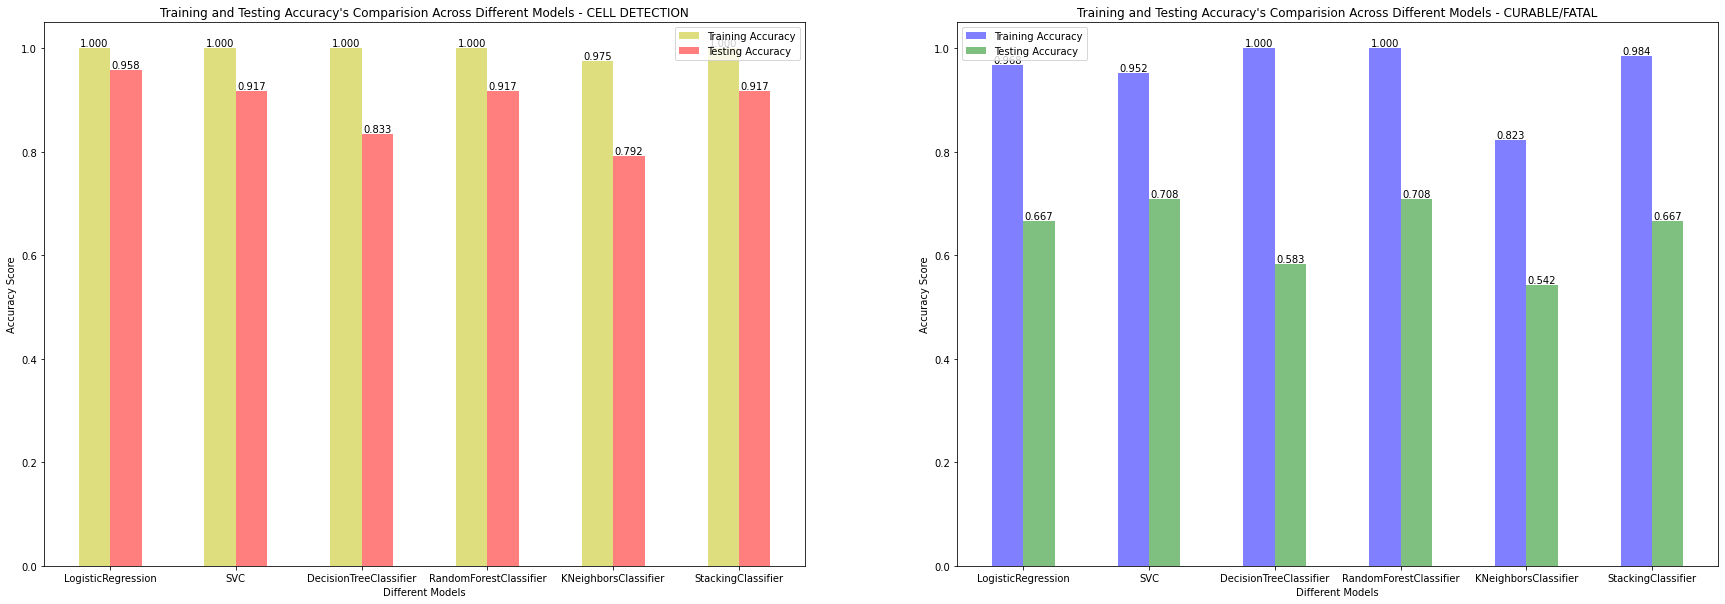

In [290]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,'%.3f' %float(round(height,3)),ha='center', va='bottom')
ind = np.arange(len(models))
trn_bar = plt.bar(ind, trn_accs1, 0.25,alpha=0.5,color='y',label='Training Accuracy')
autolabel(trn_bar)
tst_bar = plt.bar(ind + 0.25, tst_accs1, 0.25,alpha=0.5,color='r',label='Testing Accuracy')
autolabel(tst_bar)
plt.xlabel('Different Models')
plt.ylabel('Accuracy Score')
plt.title("Training and Testing Accuracy's Comparision Across Different Models - CELL DETECTION")
plt.xticks(ind + 0.125, models)
plt.legend()
plt.subplot(1,2,2)
#plt.figure(figsize=(20,12))
ind = np.arange(len(models))
trn_bar = plt.bar(ind, trn_accs2, 0.25,alpha=0.5,color='b',label='Training Accuracy')
autolabel(trn_bar)
tst_bar = plt.bar(ind + 0.25, tst_accs2, 0.25,alpha=0.5,color='g',label='Testing Accuracy')
autolabel(tst_bar)
plt.xlabel('Different Models')
plt.ylabel('Accuracy Score')
plt.title("Training and Testing Accuracy's Comparision Across Different Models - CURABLE/FATAL")
plt.xticks(ind + 0.125, models)
plt.legend()
plt.show()